<a href="https://colab.research.google.com/github/Bernardo-Senna/DataScience_Cryptocurrency_Project/blob/main/notebooks/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICD - Projeto Final: Cryptocurrency
## Introdução
Neste trabalho vamos analisar informações históricas de preços de algumas das principais criptomoedas do mercado, por capitalização.

### Motivação
A motivação pelo trabalho veio de um interesse em comum entre os membros do grupo, à respeito da ascenção apresentada pelas Cripto Moedas. 
Para entender melhor as influências criadas por elas no mercado financeiro, e também os diversos impactos causados por elas, escolhemos uma base de dados que apresenta os dados históricos de 23 das principais cripto moedas existentes.

### Dados Utilizados
Para a realização deste projeto, foi necessário utilizar alguns conjuntos de dados de domínio público (Kaggle). Nesta seção iremos entrar em mais detalhes sobre as bases utilizadas.

In [117]:
import numpy as np
from matplotlib import pyplot as plt
import math
import random
import pandas as pd
import scipy as sci
import scipy.stats as st
import seaborn as sb
import statsmodels.api as sm
import os
import pandas
import sklearn
from statsmodels import tsa
import scipy.stats
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import roc_auc_score

In [2]:
notebooks_dir = os.getcwd()

### Tratamento dos dados

Nesta seção nós faremos o parse dos dados do banco para um conjunto de dataframes Pandas.

In [3]:
#o comando abaixo faz com que o Pandas identifique dados que tendem ao infinito (inf ou -inf), tratando-os como NaN
pandas.options.mode.use_inf_as_na = True

In [4]:
coinsDict = {
    'aave':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Aave.csv"),
    'binanceCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_BinanceCoin.csv"),
    'bitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Bitcoin.csv"),
    'cardano':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cardano.csv"),
    'chainLink':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_ChainLink.csv"),
    'cosmos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Cosmos.csv"),
    'cryptocomCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_CryptocomCoin.csv"),
    'dogecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Dogecoin.csv"),
    'eos':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_EOS.csv"),
    'ethereum':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Ethereum.csv"),
    'lota':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Iota.csv"),
    'litecoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Litecoin.csv"),
    'monero':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Monero.csv"),
    'nem':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_NEM.csv"),
    'polkadot':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Polkadot.csv"),
    'solana':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Solana.csv"),
    'stellar':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Stellar.csv"),
    'tether':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tether.csv"),
    'tron':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Tron.csv"),
    'usdCoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_USDCoin.csv"),
    'uniswap':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_Uniswap.csv"),
    'wrappedBitcoin':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_WrappedBitcoin.csv"),
    'xrp':  pd.read_csv("https://raw.githubusercontent.com/Bernardo-Senna/DataScience_Cryptocurrency_Project/main/data_base/coin_XRP.csv"),
}

In [5]:
#parse da forma como vem dos datasets
coinsDict['aave']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Aave,AAVE,2020-10-05 23:59:59,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,2,Aave,AAVE,2020-10-06 23:59:59,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,3,Aave,AAVE,2020-10-07 23:59:59,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,4,Aave,AAVE,2020-10-08 23:59:59,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,5,Aave,AAVE,2020-10-09 23:59:59,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...,...,...
141,142,Aave,AAVE,2021-02-23 23:59:59,401.648853,288.714523,400.784976,359.497520,1.179704e+09,4.461395e+09
142,143,Aave,AAVE,2021-02-24 23:59:59,402.910314,344.938860,360.210985,367.230900,7.635339e+08,4.557747e+09
143,144,Aave,AAVE,2021-02-25 23:59:59,384.707877,337.501464,367.219217,337.501464,4.506436e+08,4.189245e+09
144,145,Aave,AAVE,2021-02-26 23:59:59,350.865442,305.153562,338.277176,323.108175,5.491783e+08,4.011296e+09


In [6]:
for coin in coinsDict:
    #separação das datas em dia, mês e ano
    coinsDict[coin]['Year'] = coinsDict[coin]['Date'].map(lambda x: x[0:4])
    coinsDict[coin]['Month'] = coinsDict[coin]['Date'].map(lambda x: x[5:7])
    coinsDict[coin]['Day'] = coinsDict[coin]['Date'].map(lambda x: x[8:10])
    # inclusão da variável difference, que significa a diferença entre o valor de abertura e fechamento da moeda no dia
    coinsDict[coin]['Difference'] = coinsDict[coin]['Close'] - coinsDict[coin]['Open']
    # inclusão de difference percentage, que demonstra os valores de difference, mas percentualmente, para melhor análise
    coinsDict[coin]['DifferencePerc'] = coinsDict[coin]['Difference'] / coinsDict[coin]['Open']
    # limpeza de Date, excluíndo o horário, porque todos são 23:59, ou seja, irrelevante
    coinsDict[coin]['Date'] = coinsDict[coin]['Date'].map(lambda x: x[0:10])

In [7]:
coinsDict['aave']

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DifferencePerc
0,1,Aave,AAVE,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07,2020,10,05,0.544208,0.010331
1,2,Aave,AAVE,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07,2020,10,06,-10.890371,-0.204353
2,3,Aave,AAVE,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07,2020,10,07,-2.315971,-0.054622
3,4,Aave,AAVE,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08,2020,10,08,3.879201,0.097259
4,5,Aave,AAVE,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08,2020,10,09,3.053281,0.069766
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Aave,AAVE,2021-02-23,401.648853,288.714523,400.784976,359.497520,1.179704e+09,4.461395e+09,2021,02,23,-41.287456,-0.103016
142,143,Aave,AAVE,2021-02-24,402.910314,344.938860,360.210985,367.230900,7.635339e+08,4.557747e+09,2021,02,24,7.019914,0.019488
143,144,Aave,AAVE,2021-02-25,384.707877,337.501464,367.219217,337.501464,4.506436e+08,4.189245e+09,2021,02,25,-29.717754,-0.080926
144,145,Aave,AAVE,2021-02-26,350.865442,305.153562,338.277176,323.108175,5.491783e+08,4.011296e+09,2021,02,26,-15.169000,-0.044842


### Análise preliminar: comportamento individual das moedas no tempo

Nestes plots evidenciamos o comportamento de cada moeda ao longo do tempo, individualmente.

#### Disclaimer!
Os plots foram transferidos para pastas externas para:
1. Possibilitar salvá-los e utilizá-los posteriormente
2. Facilitar a visualização, visto que são muitos plots, que poluem o notebook quando colocados todos juntos em sequência

In [8]:
#Cada ítem desta lista significa: (nome da pasta onde os gráficos estão plotados, nome da variável no DataFrame)
plotting_pairs = [("CloseValue", "Close"), ("OpenCloseDiff", "Difference"), ("OpenCloseDiffPerc", "DifferencePerc"),
                  ("HighestValue", "High"), ("LowestValue", "Low"), ("MarketCap", "Marketcap"), 
                  ("TransactionsVolume", "Volume")]

##### Plots das progressões no tempo

In [9]:
os.chdir(notebooks_dir)
os.chdir("../plots/IndividualValueProgressionOverTime/")

In [10]:
def plot_progression(coinsDict, param):
    for name, coin in coinsDict.items():
      fig = plt.figure()
      coin.plot("Date",param, ax=fig.add_subplot())
      plt.title(name)
      plt.xticks(rotation=90)
      plt.ylabel("value in USD")
      plt.savefig("{}.png".format(name), transparent=True, bbox_inches='tight')
      plt.close()
      #plt.show()

In [11]:
for pair in plotting_pairs:
    if pair[0] == "CloseValue": os.chdir("{}".format(pair[0]))
    else: os.chdir("../{}".format(pair[0]))
    print("Você pode encontrar os plots referentes a progressão do valor de {} no tempo na pasta:".format(pair[1]), os.getcwd())
    plot_progression(coinsDict, pair[1])

Você pode encontrar os plots referentes a progressão do valor de Close no tempo na pasta: C:\Users\cryptojourney\Documents\DataScience_Cryptocurrency_Project\plots\IndividualValueProgressionOverTime\CloseValue
Você pode encontrar os plots referentes a progressão do valor de Difference no tempo na pasta: C:\Users\cryptojourney\Documents\DataScience_Cryptocurrency_Project\plots\IndividualValueProgressionOverTime\OpenCloseDiff
Você pode encontrar os plots referentes a progressão do valor de DifferencePerc no tempo na pasta: C:\Users\cryptojourney\Documents\DataScience_Cryptocurrency_Project\plots\IndividualValueProgressionOverTime\OpenCloseDiffPerc
Você pode encontrar os plots referentes a progressão do valor de High no tempo na pasta: C:\Users\cryptojourney\Documents\DataScience_Cryptocurrency_Project\plots\IndividualValueProgressionOverTime\HighestValue
Você pode encontrar os plots referentes a progressão do valor de Low no tempo na pasta: C:\Users\cryptojourney\Documents\DataScience_Cr

#### Stats básicos das moedas no tempo

In [23]:
keys = ["CloseValue", "OpenCloseDiff", "OpenCloseDiffPerc", "HighestValue", "LowestValue", "MarketCap", "TransactionsVolume"]
statsDict = dict.fromkeys(keys)

In [40]:
for pair in plotting_pairs:
    if statsDict[pair[0]] is None: statsDict[pair[0]] = pd.DataFrame()
    for name, coin in coinsDict.items():
        statsDict[pair[0]][name] = coin[pair[1]].describe()   

In [42]:
for key, df in statsDict.items():
    statsDict[key] = statsDict[key].transpose()

In [44]:
statsDict["HighestValue"]

,count,mean,std,min,25%,50%,75%,max
aave,146.0,164.001100,156.486088,28.433069,60.988168,87.666625,204.523318,559.122944
binanceCoin,1313.0,19.817551,27.153366,0.101211,10.050000,15.845876,23.245484,342.879593
bitcoin,2862.0,4974.040239,7188.836678,74.561096,426.047752,1197.334961,8138.046589,58330.572142
cardano,1245.0,0.146055,0.190901,0.021050,0.045570,0.083514,0.149314,1.476653
chainLink,1256.0,4.016318,6.256334,0.157440,0.432987,1.429845,3.963060,36.828460
cosmos,716.0,4.940636,3.281356,1.813534,3.174778,4.370125,5.435860,26.419385
cryptocomCoin,806.0,0.071834,0.044087,0.012463,0.039614,0.062946,0.085170,0.270960
dogecoin,2631.0,0.002566,0.006796,0.000089,0.000229,0.001645,0.002810,0.084945
eos,1337.0,4.714829,3.407972,0.518657,2.661220,3.497878,5.661690,22.890400
ethereum,2031.0,267.068034,322.096221,0.482988,13.221850,189.088865,342.238919,2036.286493


In [45]:
os.chdir(notebooks_dir)
os.chdir("../spreadsheets/")

In [46]:
def write_excel(filename, sheetname, dataframe):
    with pd.ExcelWriter(filename, engine='openpyxl', mode='a') as writer: 
        workBook = writer.book
        try:
            workBook.remove(workBook[sheetname])
        finally:
            dataframe.to_excel(writer, sheet_name=sheetname,index=False)
            writer.save()

In [47]:
for name, df in statsDict.items():
    write_excel('simple_stats.xlsx', name ,df)

### Correlações entre as moedas
Nesta sessão iremos explorar, durante um periodo de tempo especifico, duas correlações:
1. Entre os valores de fechamento de todas com todas
2. Entre as variações de valor de todas com todas

Aqui o ano de 2019 foi o escolhido porque este é o com maior quantidade de dados para todas as moedas.

In [111]:
os.chdir(notebooks_dir)
os.chdir("../plots/Heatmaps")

In [112]:
dates = coinsDict["bitcoin"][coinsDict["bitcoin"]["Year"] == "2019"]["Date"]

In [113]:
closes = {name: coin[coin["Date"].isin(dates)]["Close"].to_numpy() for name, coin in coinsDict.items()}
closes = {name:coin for name,coin in closes.items() if len(coin) == 365}
closes = pd.DataFrame(slopes)

In [122]:
closes

,binanceCoin,bitcoin,cardano,chainLink,cryptocomCoin,dogecoin,eos,ethereum,lota,litecoin,monero,nem,stellar,tether,tron,usdCoin,xrp
0,6.075273,3843.519967,0.042547,0.299371,0.021466,0.002392,2.663533,140.819413,0.369184,31.979930,48.367497,0.066118,0.115930,1.018335,0.019561,1.013301,0.364771
1,6.188613,3943.409337,0.045258,0.316489,0.021441,0.002407,2.887629,155.047677,0.394705,33.433682,52.252449,0.067139,0.119331,1.024012,0.020222,1.018173,0.375243
2,5.903535,3836.741319,0.042682,0.365974,0.021424,0.002360,2.681411,149.135003,0.379233,32.026699,49.815357,0.064862,0.113825,1.019473,0.020088,1.013577,0.360224
3,6.065138,3857.717619,0.043812,0.437175,0.021559,0.002315,2.721645,154.581942,0.377061,32.404168,50.630874,0.065011,0.115361,1.017200,0.021492,1.008160,0.356747
4,6.065543,3845.194460,0.044701,0.395948,0.018613,0.002319,2.699468,155.638589,0.369546,34.936866,49.931811,0.064621,0.114046,1.018489,0.022294,1.011010,0.355275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,13.362720,7290.088518,0.033100,1.886506,0.035576,0.002053,2.580784,127.214611,0.163111,41.178173,45.344426,0.032484,0.046086,1.005803,0.013300,1.008644,0.191102
361,13.705417,7317.990034,0.033632,1.874338,0.034017,0.002064,2.630518,128.322712,0.163544,42.842522,45.548682,0.032815,0.045151,1.000307,0.013515,1.002402,0.193222
362,14.150045,7422.652589,0.034284,1.902404,0.034875,0.002068,2.692497,134.757985,0.168519,43.670659,46.829259,0.032368,0.046216,1.004210,0.013743,1.005283,0.197051
363,13.947442,7292.995078,0.033594,1.838974,0.033930,0.002054,2.645544,132.633489,0.160764,42.747337,46.498085,0.031994,0.045954,1.006175,0.013400,1.009358,0.194474


In [118]:
slopes = {name: coin[coin["Date"].isin(dates)]["DifferencePerc"].to_numpy() for name, coin in coinsDict.items()}
slopes = {name:coin for name,coin in closes.items() if len(coin) == 365}
slopes = pd.DataFrame(slopes)

In [121]:
slopes

,binanceCoin,bitcoin,cardano,chainLink,cryptocomCoin,dogecoin,eos,ethereum,lota,litecoin,monero,nem,stellar,tether,tron,usdCoin,xrp
0,6.075273,3843.519967,0.042547,0.299371,0.021466,0.002392,2.663533,140.819413,0.369184,31.979930,48.367497,0.066118,0.115930,1.018335,0.019561,1.013301,0.364771
1,6.188613,3943.409337,0.045258,0.316489,0.021441,0.002407,2.887629,155.047677,0.394705,33.433682,52.252449,0.067139,0.119331,1.024012,0.020222,1.018173,0.375243
2,5.903535,3836.741319,0.042682,0.365974,0.021424,0.002360,2.681411,149.135003,0.379233,32.026699,49.815357,0.064862,0.113825,1.019473,0.020088,1.013577,0.360224
3,6.065138,3857.717619,0.043812,0.437175,0.021559,0.002315,2.721645,154.581942,0.377061,32.404168,50.630874,0.065011,0.115361,1.017200,0.021492,1.008160,0.356747
4,6.065543,3845.194460,0.044701,0.395948,0.018613,0.002319,2.699468,155.638589,0.369546,34.936866,49.931811,0.064621,0.114046,1.018489,0.022294,1.011010,0.355275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,13.362720,7290.088518,0.033100,1.886506,0.035576,0.002053,2.580784,127.214611,0.163111,41.178173,45.344426,0.032484,0.046086,1.005803,0.013300,1.008644,0.191102
361,13.705417,7317.990034,0.033632,1.874338,0.034017,0.002064,2.630518,128.322712,0.163544,42.842522,45.548682,0.032815,0.045151,1.000307,0.013515,1.002402,0.193222
362,14.150045,7422.652589,0.034284,1.902404,0.034875,0.002068,2.692497,134.757985,0.168519,43.670659,46.829259,0.032368,0.046216,1.004210,0.013743,1.005283,0.197051
363,13.947442,7292.995078,0.033594,1.838974,0.033930,0.002054,2.645544,132.633489,0.160764,42.747337,46.498085,0.031994,0.045954,1.006175,0.013400,1.009358,0.194474


In [119]:
def corr_heatmaps(data1, data1_name, data2, data2_name):

    # Basic Configuration
    fig, axes = plt.subplots(ncols=2, figsize=(12, 12))
    ax1, ax2 = axes
    corr_matrix1 = data1.corr()
    corr_matrix2 = data2.corr()
    columns1 = corr_matrix1.columns
    columns2 = corr_matrix2.columns

    # Heat maps
    im1 = ax1.matshow(corr_matrix1, cmap='coolwarm')
    im2 = ax2.matshow(corr_matrix2, cmap='coolwarm')

    # Formatting for heat map 1.
    ax1.set_xticks(range(len(columns1)))
    ax1.set_yticks(range(len(columns1)))
    ax1.set_xticklabels(columns1)
    ax1.set_yticklabels(columns1)
    ax1.set_title(data1_name, y=-0.1)
    plt.setp(ax1.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
    plt.colorbar(im1, fraction=0.045, pad=0.05, ax=ax1)

    # Formatting for heat map 2.
    ax2.set_xticks(range(len(columns2)))
    ax2.set_yticks(range(len(columns2)))
    ax2.set_xticklabels(columns2)
    ax2.set_yticklabels(columns2)
    ax2.set_title(data2_name, y=-0.1)
    plt.setp(ax2.get_xticklabels(), rotation=90, ha='left', rotation_mode='anchor')
    plt.colorbar(im2, fraction=0.045, pad=0.05, ax=ax2)

    fig.tight_layout()
    
    plt.savefig("correlations_heatmaps.png".format(name), transparent=True, bbox_inches='tight')

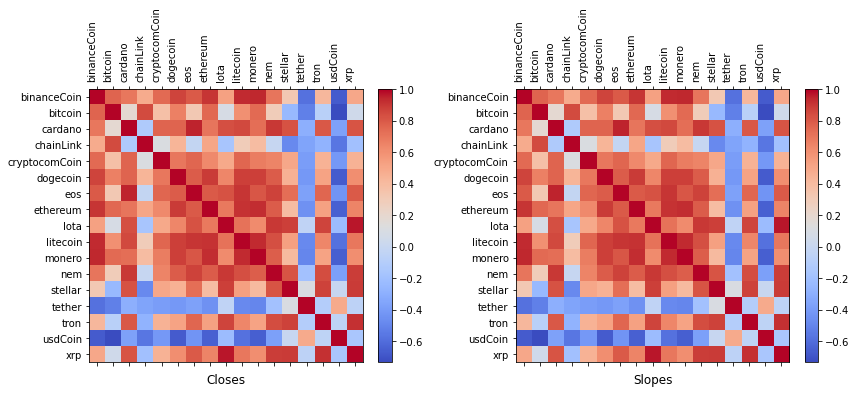

In [120]:
corr_heatmaps(closes, "Closes", slopes, "Slopes")

Como podemos perceber, as comparações são basicamente equivalentes, visto que os heatmaps de Close e Slope são 
virtualmente idênticos. Por isso, a partir de agora usaremos apenas uma das correlações, a de Slope,
para progredir nossa análise.

#### Previsão do comportamento e valor de uma moeda baseada nas demais

In [86]:
columns = list(closes.columns)
data = []
for coin in columns:
    cols = columns.copy()
    cols.remove(coin)
    df = closes[cols].copy()
    y = closes[coin]
    df = sm.add_constant(df)
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /= 5
    
    est = sm.OLS(closes[coin], df)
    est = est.fit()
    data += [(coin, est.rsquared, est.mse_total, err, y.mean())]

In [88]:
closes_df = pd.DataFrame(data, columns=["coin", "R²", "MSE", "CV MSE", "Mean(y)"])
closes_df.set_index("coin")

,R²,MSE,CV MSE,Mean(y)
coin,,,,
binanceCoin,0.969274,6.927977e+01,1.287230e+01,20.092979
bitcoin,0.979702,6.962395e+06,5.957193e+05,7395.246281
cardano,0.972919,3.421702e-04,9.141280e-05,0.055499
chainLink,0.938322,8.836554e-01,4.128434e-01,1.536396
cryptocomCoin,0.808844,4.622954e-04,8.269393e-04,0.044579
dogecoin,0.914836,1.989740e-07,8.866599e-08,0.002563
eos,0.970325,1.974309e+00,2.790314e-01,4.020991
ethereum,0.983129,2.538413e+03,1.887110e+02,181.770138
lota,0.968561,4.921056e-03,6.484878e-04,0.297822


Um resultado muito positivo, exceto para o caso da usdCoin, que tem um comportamento anômalo. Nota-se que o MSE tem uma escala proxima da média de y.

Porem, pode ser mais interessante/lucrativo prever a variação de uma moeda dadas as outras moedas. Isso é testado a seguir

In [92]:
columns = list(slopes.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = slopes[cols].copy()
    df = sm.add_constant(df)
    y = slopes[col]
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LinearRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y.values[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += np.mean((y_hat-y.values[test_idx])**2)
    err /= 5
    
    
    est = sm.OLS(slopes[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]

In [93]:
slopes_df = pd.DataFrame(data, columns=["coin", "R²", "CV MSE"])
slopes_df.set_index("coin")

,R²,CV MSE
coin,,
binanceCoin,0.969274,1.287230e+01
bitcoin,0.979702,5.957193e+05
cardano,0.972919,9.141280e-05
chainLink,0.938322,4.128434e-01
cryptocomCoin,0.808844,8.269393e-04
dogecoin,0.914836,8.866599e-08
eos,0.970325,2.790314e-01
ethereum,0.983129,1.887110e+02
lota,0.968561,6.484878e-04


O resultado não é tão positivo quanto o anterior, mas algumas moedas ainda apresentam R² relativamente alto e MSE baixo.

Porém, pode fazer mais sentido tentar prever se a moeda vai ter crescimento ou decrescimento de valor naquele dia, independente do valor do crescimento. Isso é explorado a seguir.

In [ ]:
columns = list(var.columns)
data = []
for col in columns:
    cols = columns.copy()
    cols.remove(col)
    df = var[cols].copy()
    df = (df - df.mean(0))/df.std(0)
    df = sm.add_constant(df)
    y = var[col].values
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
    err /= 5
    
    est = sm.OLS(var[col], df)
    est = est.fit()
    data += [(col, est.rsquared, err)]
pd.DataFrame(data, columns=["coin", "R²", "CV ROCAUC"])

Para algumas moedas, como a stellar, temos um preditor razoável de variação dada umas variação. Porém, talvez seja mais relevante prever o valor com antecedência, usando por exemplo os valores das moedas no dia anterior.

In [ ]:
columns = list(var.columns)
data = []
for col in columns:
    cols = columns.copy()
    df = var[cols].copy()
    df = (df - df.mean(0))/df.std(0)
    df = sm.add_constant(df)
    df = df.iloc[:-1]
    y = var[col].values[1:]
    y = (y> 0).astype(int)
    kfold = KFold(5)
    err = 0.
    baseline_err = 0.
    for train_idx, test_idx in kfold.split(df.values):
        lr = LogisticRegression(fit_intercept=False)
        lr.fit(df.values[train_idx], y[train_idx])
        y_hat = lr.predict(df.values[test_idx])
        err += roc_auc_score(y[test_idx], y_hat)
        
        baseline_pred = (df[col].values[test_idx]> 0).astype(int)
        baseline_err += roc_auc_score(y[test_idx], baseline_pred)
    err /= 5
    baseline_err /= 5
    y = var[col].iloc[1:]
    y.index = df.index
    est = sm.OLS(y, df)
    est = est.fit()
    data += [(col, est.rsquared, err, baseline_err)]
pd.DataFrame(data, columns=["coin", "R²", "CV ROCAUC", "Baseline"])

Lamentavelmente uma regressão logistica utilizando $X_{t-1}$ tem resultado pouco melhor que o acaso para a maioria das CMs. Porém é melhor que o baseline de repetir o sinal do ultimo valor.

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

def split(df):
    size = len(df)
    return df.iloc[:round(size*0.9)], df.iloc[round(size*0.9):]

data = []
for coin in coinsDict.keys():
    df = coinsDict[coin]
    df["LogDiff"] = np.log1p(df["Close"]) - np.log1p(df["Open"])
    
    train, test = split(df[["LogDiff"]])
    model = AutoReg(train, lags=10)
    res = model.fit()
    plt.figure()
    plt.title(f"{coin} LogDifferences")
    plt.plot(df["LogDiff"])
    plt.plot(res.fittedvalues)
    plt.plot(res.forecast(steps=len(test)))
    predictions = res.forecast(steps=len(test)).values
    plt.show()
    correct = (predictions > 0) == (test.values[:, 0] > 0)
    acc = correct.mean()
    first_correct = correct[0]
    data += [(coin, acc, first_correct)]

pd.DataFrame(data, columns=["CM", "ACC", "Immediate Pred"])


Vemos aqui que para alguma moedas, uma simples autorregressão pode prever com 60% de acerto as subidas e descidadas de algumas CMs.

In [ ]:
# coinsDict["bitcoin"].hist("Difference", bins=100)
import seaborn as sns
import scipy.stats
for name in coinsDict.keys():
  _, pvalue = scipy.stats.shapiro(coinsDict[name]["Close"] - coinsDict[name]["Open"])
  print(name, pvalue)
  print(len(coinsDict[name]))

In [ ]:
subdf = coinsDict['bitcoin'][['Difference', 'Year', 'Month']].groupby(['Year', 'Month']).sum()

In [ ]:
subdf
# plt.hist(subdf['Difference'])

In [ ]:
#dados Z-normalizdos por dia
Zcoindict = coinsDict.copy()

for coin in Zcoindict:
    Zcoindict[coin]['High'] = (Zcoindict[coin]['High'] - Zcoindict[coin]['High'].mean())/Zcoindict[coin]['High'].std()
    Zcoindict[coin]['Low'] = (Zcoindict[coin]['Low'] - Zcoindict[coin]['Low'].mean())/Zcoindict[coin]['Low'].std()
    Zcoindict[coin]['Open'] = (Zcoindict[coin]['Open'] - Zcoindict[coin]['Open'].mean())/Zcoindict[coin]['Open'].std()
    Zcoindict[coin]['Close'] = (Zcoindict[coin]['Close'] - Zcoindict[coin]['Close'].mean())/ Zcoindict[coin]['Close'].std()
    # Zcoindict[coin]['Variation'] = (Zcoindict[coin]['Variation'] - Zcoindict[coin]['Variation'].mean())/Zcoindict[coin]['Variation'].std()

Zcoindict['bitcoin'].tail()



In [ ]:
#A data de criação da moeda diz algo a respeito do seu Marketcap atual ?

from datetime import datetime

df_allCoins = pd.DataFrame()

for coins in coinsDict:
  df_aux = convert(coinsDict[coins].iloc[[0, -1]], 'dataframe')
  df_allCoins = pd.concat([df_allCoins, df_aux], ignore_index=True)

df_coin_per_existence_time = pd.DataFrame(columns=['Name', 'Existence_time (days)', 'Last_Marketcap'])

for coinName in np.unique(df_allCoins["Name"]):
  init_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[0]
  init_time = datetime.fromisoformat(init_time)

  end_time = df_allCoins[df_allCoins["Name"] == coinName]["Date"].iloc[1]
  end_time = datetime.fromisoformat(end_time)

  existence_time = (pd.Timedelta(end_time - init_time).days)

  last_mktcap = df_allCoins[df_allCoins["Name"] == coinName]["Marketcap"].iloc[1]

  series_aux = pd.Series([coinName, existence_time, last_mktcap], index=df_coin_per_existence_time.columns)
  df_coin_per_existence_time = pd.concat([df_coin_per_existence_time, convert(series_aux, 'dataframe')], ignore_index=True)

df_coin_per_existence_time = df_coin_per_existence_time.sort_values(by=['Existence_time (days)', 'Last_Marketcap']).reset_index()
df_coin_per_existence_time


In [ ]:
df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).corr()

In [ ]:
x, y = df_coin_per_existence_time[["Existence_time (days)","Last_Marketcap"]].applymap(float).values.T
x = sm.add_constant(x)
res = sm.OLS(y, x).fit()
res.summary()

# REVER

In [48]:
def convert(data, to):
    converted = None
    if to == 'array':
        if isinstance(data, np.ndarray):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, list):
            converted = np.array(data)
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, np.ndarray):
            converted = data.tolist()
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
        elif isinstance(data, pd.Series):
            converted = data.to_frame().T
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    if converted is None:
        raise TypeError('cannot handle data conversion of type: {} to {}'.format(type(data),to))
    else:
        return converted


$X_i = X_{i-1} + \delta_i$; $\delta_i = \delta_{i-1} + \Delta_i$

In [51]:
coinsDict['bitcoin']['Difference'].var()

167320.49522623324

In [52]:
#variancia da variação

coinsDict['bitcoin']['Difference'].std()

409.04827982309524

In [53]:
coinsDict['bitcoin'].head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap,Year,Month,Day,Difference,DifferencePerc
0,1,Bitcoin,BTC,2013-04-29,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09,2013,04,29,10.095993,0.075094
1,2,Bitcoin,BTC,2013-04-30,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09,2013,04,30,-5.000000,-0.034722
2,3,Bitcoin,BTC,2013-05-01,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09,2013,05,01,-22.010002,-0.158345
3,4,Bitcoin,BTC,2013-05-02,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09,2013,05,02,-11.169998,-0.095979
4,5,Bitcoin,BTC,2013-05-03,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09,2013,05,03,-8.500000,-0.080000
